In [1]:
from import_data import HMXB_parameters_Kaper
from import_data import HMXB_parameters
from import_data import supergiant_stellar_parameters
from import_data import falenga
from functions import scientific_notation
from functions import display_df
from functions import decompose_spectral_type
from import_data import stellar_params
from import_data import photometric_params
from import_data import BailerJones

from astropy.constants import R_sun, L_sun, sigma_sb
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from scipy.interpolate import interp1d

In [2]:
df_stellar_params = stellar_params()

In [3]:
df_stellar_params

,ST,Teff,log(g_spec),Mv,BC,log(L/Lsun),R,M_spec,logq0,logq1,logQ0,logQ1
0,O3V,44852,3.92,-5.79,-4.05,5.84,13.80,57.95,24.57,23.98,49.64,49.04
1,O4V,42857,3.92,-5.50,-3.91,5.67,12.42,46.94,24.47,23.82,49.44,48.79
2,O5V,40862,3.92,-5.21,-3.77,5.49,11.20,38.08,24.34,23.66,49.22,48.54
3,O5.5V,39865,3.92,-5.07,-3.70,5.41,10.64,34.39,24.27,23.57,49.10,48.41
4,O6V,38867,3.92,-4.92,-3.62,5.32,10.11,30.98,24.20,23.46,48.99,48.26
5,O6.5V,37870,3.92,-4.77,-3.55,5.23,9.61,28.00,24.13,23.34,48.88,48.09
6,O7V,36872,3.92,-4.63,-3.47,5.14,9.15,25.29,24.04,23.17,48.75,47.88
7,O7.5V,35874,3.92,-4.48,-3.39,5.05,8.70,22.90,23.94,22.98,48.61,47.64
8,O8V,34877,3.92,-4.34,-3.30,4.96,8.29,20.76,23.82,22.68,48.44,47.30
9,O8.5V,33879,3.92,-4.19,-3.22,4.86,7.90,18.80,23.69,22.23,48.27,46.81


In [4]:
df_filtered = df_stellar_params[df_stellar_params['ST'].str.contains(r'\bV\b')][df_stellar_params['ST'].str.contains('O')].reset_index(drop=True)
df_filtered

/tmp/ipykernel_11636/956925585.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_stellar_params[df_stellar_params['ST'].str.contains(r'\bV\b')][df_stellar_params['ST'].str.contains('O')].reset_index(drop=True)


,ST,Teff,log(g_spec),Mv,BC,log(L/Lsun),R,M_spec,logq0,logq1,logQ0,logQ1


In [5]:
def extract_number_from_spectral_type(spectral_type):
    pattern = re.compile(r'\d+(\.\d+)?')
    match = pattern.search(spectral_type)
    
    if match and match.group() != '':
        extracted_number = float(match.group())
        
        # Check if the spectral type starts with 'B' and add 10 to the extracted number
        if spectral_type.startswith('B'):
            extracted_number += 10.0
            
        return extracted_number
    else:
        return None

def interpolate_value(spectral_type_values: list, spectral_type_numbers: list, target_number: float):
    # Ensure the input lists are of the same length
    if len(spectral_type_values) != len(spectral_type_numbers):
        raise ValueError("Input lists must have the same length")

    # Create an interpolation function
    interpolate_func = interp1d(spectral_type_numbers, spectral_type_values, kind='linear', fill_value='extrapolate')

    # Use the interpolation function to get the value at the target number
    interpolated_value = interpolate_func(target_number)

    return interpolated_value


def interpolate(df2: pd.DataFrame, spectral_type: str, quantity: str, plot: bool = False):
    """
    
    """
    # Make sure we don't change the input dataframe
    df = df2.copy()

    # Get the short spectral type and luminosity class
    spectral_type_short, luminosity_class = decompose_spectral_type(spectral_type)

    # Make a new column with luminosity class
    df['luminosity_class'] = df['ST'].apply(decompose_spectral_type).apply(lambda x: x[1])

    # If luminosity class equals Ia, then set it to I
    if luminosity_class == 'Ia':
        luminosity_class = 'I'

    # Filter dataframe for luminosity class
    df = df[df['ST'].str.contains('O')].loc[df['luminosity_class'] == luminosity_class].reset_index(drop=True)

    # Data for the given quantity
    spectral_type_numbers = df['ST'].apply(extract_number_from_spectral_type).tolist()
    quantity_values = df[quantity].tolist()

    # Interpolate
    target_number = extract_number_from_spectral_type(spectral_type_short)
    interpolated_value = interpolate_value(spectral_type_values=quantity_values, spectral_type_numbers=spectral_type_numbers, target_number=target_number)

    if plot:
        plt.plot(spectral_type_numbers, quantity_values, color='blue')
        plt.scatter([target_number], [interpolated_value], color='orange')
        plt.ylabel(quantity)
        plt.xlabel('Spectral type')
        plt.grid(True)
        plt.show()

    return interpolated_value

Spectral Type: B0
Luminosity Class: III
Spectral Type: O3
Luminosity Class: V
Spectral Type: O4
Luminosity Class: V
Spectral Type: O5
Luminosity Class: V
Spectral Type: O5.5
Luminosity Class: V
Spectral Type: O6
Luminosity Class: V
Spectral Type: O6.5
Luminosity Class: V
Spectral Type: O7
Luminosity Class: V
Spectral Type: O7.5
Luminosity Class: V
Spectral Type: O8
Luminosity Class: V
Spectral Type: O8.5
Luminosity Class: V
Spectral Type: O9
Luminosity Class: V
Spectral Type: O9.5
Luminosity Class: V
Spectral Type: O3
Luminosity Class: III
Spectral Type: O4
Luminosity Class: III
Spectral Type: O5
Luminosity Class: III
Spectral Type: O5.5
Luminosity Class: III
Spectral Type: O6
Luminosity Class: III
Spectral Type: O6.5
Luminosity Class: III
Spectral Type: O7
Luminosity Class: III
Spectral Type: O7.5
Luminosity Class: III
Spectral Type: O8
Luminosity Class: III
Spectral Type: O8.5
Luminosity Class: III
Spectral Type: O9
Luminosity Class: III
Spectral Type: O9.5
Luminosity Class: III
Spec

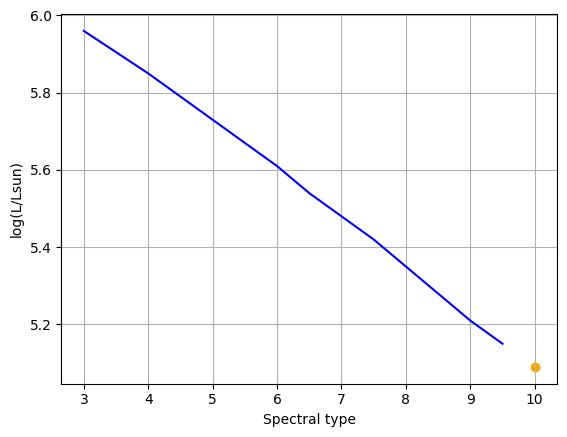

array(5.09)

In [6]:
interpolate(df2=df_stellar_params, spectral_type='B0IIIbc', quantity='log(L/Lsun)')